<a href="https://colab.research.google.com/github/VictorFBI/iad/blob/main/Frolov_Bukanov_Victor_hw05_gd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание 5. Градиентный спуск. (10 баллов + 2.5 бонус)

В этом домашнем задании вы напишете градиентный спуск для линейной регрессии, а так же посмотрите, как он ведёт себя с разными параметрами и разными функциями потерь.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

In [2]:
from typing import Iterable, List

import matplotlib.pyplot as plt
import numpy as np

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели, его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его не нужно. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

In [3]:
import abc


class BaseLoss(abc.ABC):
    """Базовый класс лосса"""

    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактоного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`

Он должен вычислять лосс и градиент по формулам наверху

In [52]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        return np.square(X.dot(w) - y).mean()

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        return (2 / y.size) * ((X.T).dot(X.dot(w) - y))

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [53]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(
    loss.calc_grad(X, y, w),
    np.array(
        [
            1163180.0,
            1172281.0,
            1181382.0,
            1190483.0,
            1199584.0,
            1208685.0,
            1217786.0,
            1226887.0,
            1235988.0,
            1245089.0,
        ]
    ),
), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`,
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать
траекторию спуска (список из новых значений весов на каждом шаге)

In [6]:
def gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    n_iterations: int = 100000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    old_w = w_init
    curr_w = None
    ans = []
    ans.append(w_init)
    for i in range(n_iterations):
      curr_w  = old_w - lr * loss.calc_grad(X, y, old_w)
      ans.append(curr_w)
      old_w = curr_w
    return ans

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [7]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [8]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.58917680450253
0.8670644395649493


In [9]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r"$w_1$")
    plt.ylabel(r"$w_2$")
    plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect("equal")

    # visualize the level set
    CS = plt.contour(
        A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
    )
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте не менее четырёх разных значений для `lr`.

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1

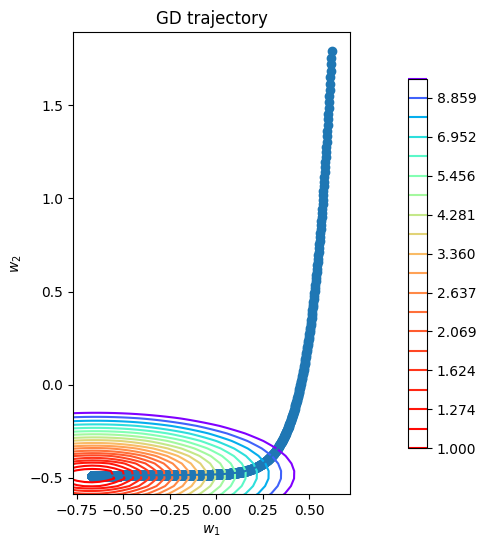

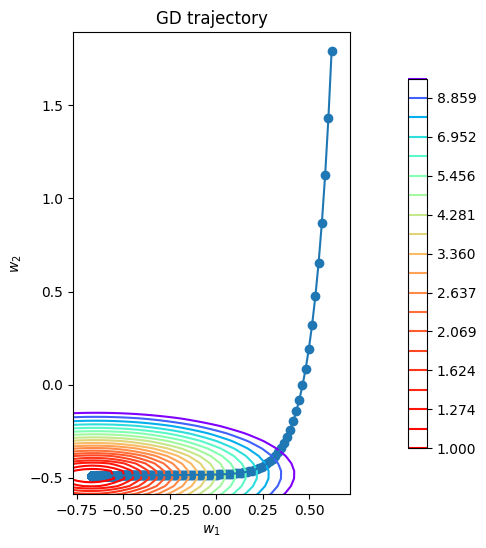

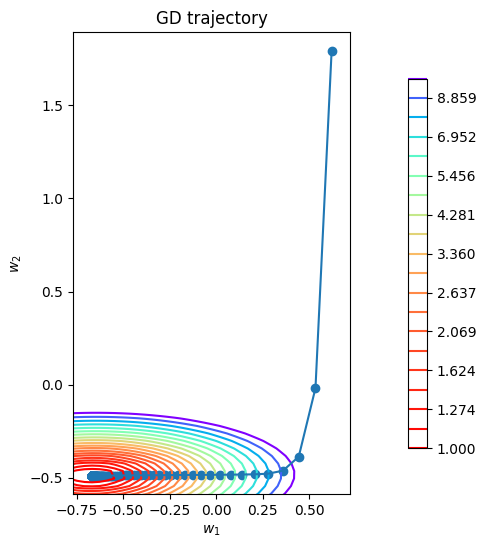

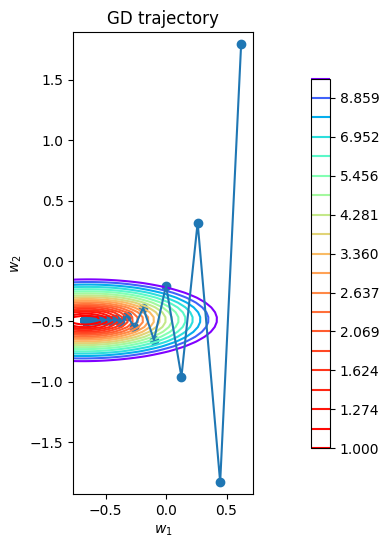

In [10]:
lrs = [0.0001, 0.001, 0.005, 0.01]
loss = MSELoss()

for lr in lrs:
  plot_gd(gradient_descent(w_init, X, y, loss, lr), X, y, loss)

По графикам заметно, что маленькие значения learning rate делают градиентный спуск более "гладким" и последовательным, что позволяет обеспечить сходимость обучения (то есть что обучение сойдется к минимуму, а не будет скакать от значения к значению, так и не приближаясь к минимуму). В целом, наблюдается тенденция увеличения скачков с увеличиением параметра lr, что логично. Как можно заметить, при $lr = 0.01$ шаги градиентного спуска очень большие и хаотичные, но все ещё сходятся к минимуму. Но, например, если взять $lr = 0.1$ или вообще очень большое, то обучение уже не сойдется и метод выбросит исключение (*ValueError: Axis limits cannot be NaN or Inf*), которое как раз и говорит о том, что в ходе градиентного спуска мы "спустились" до бесконечности, а значит, обучение не сошлось

Теперь реализуем стохастический градиентный спуск

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча.

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [11]:
def stochastic_gradient_descent1( # rename to avoid conficts in the future
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    old_w = w_init
    curr_w = None
    ans = []
    ans.append(w_init)
    for i in range(n_iterations):
      indexes = np.random.randint(0, y.size - 1, size=batch_size) # use this instead np.random.choice (https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html)
      curr_w  = old_w - lr * loss.calc_grad(X[indexes], y[indexes], old_w)
      ans.append(curr_w)
      old_w = curr_w
    return ans

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`.

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

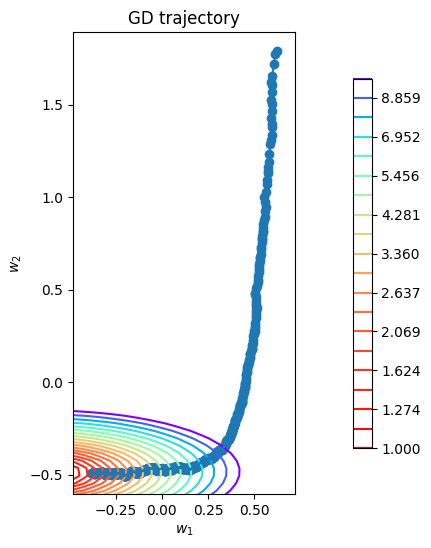

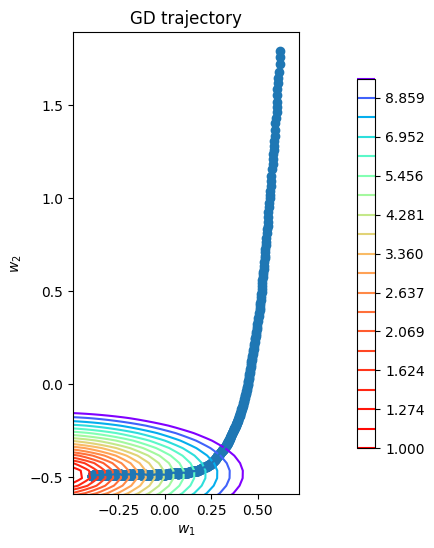

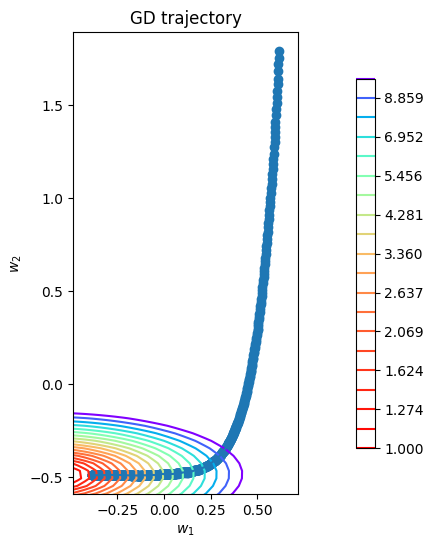

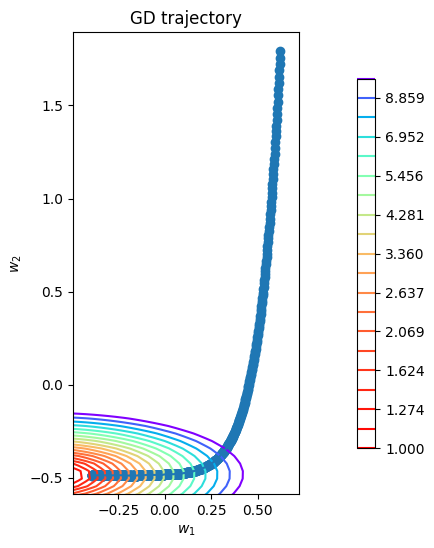

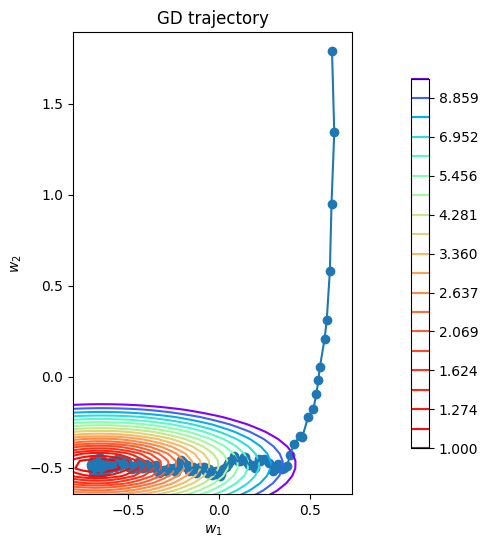

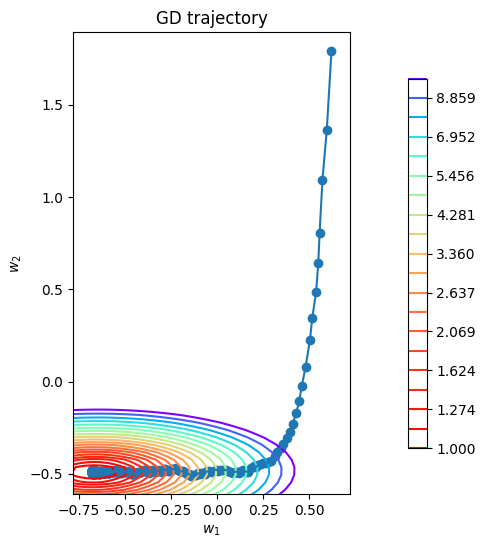

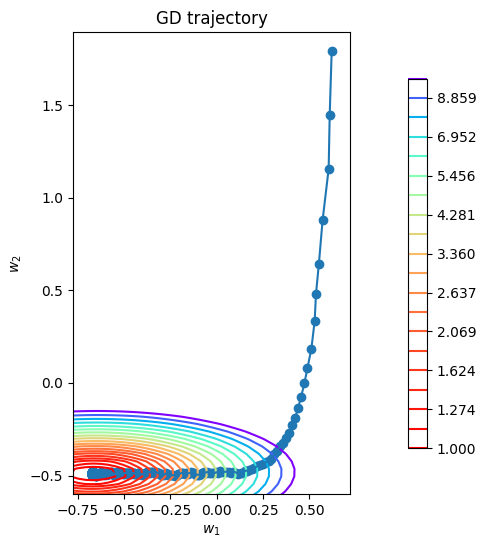

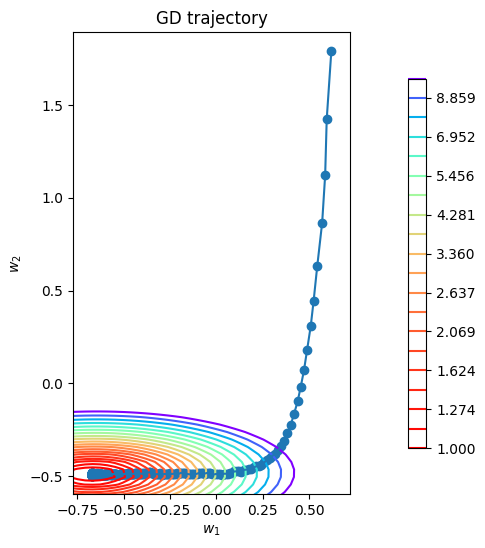

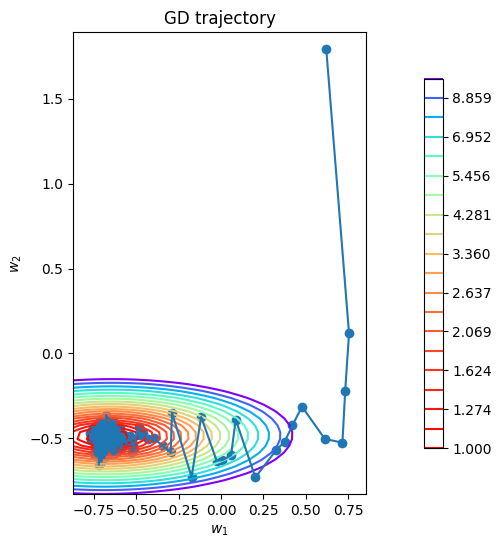

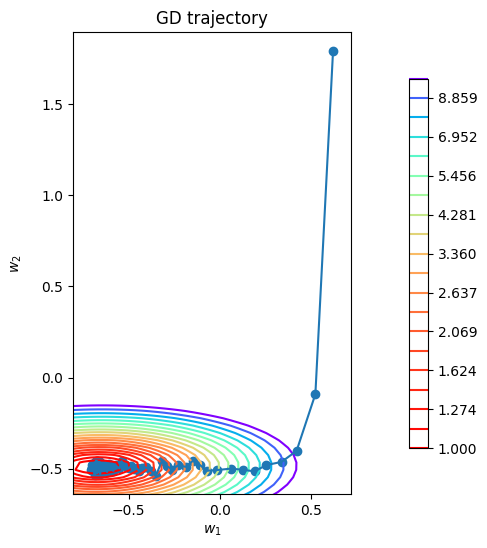

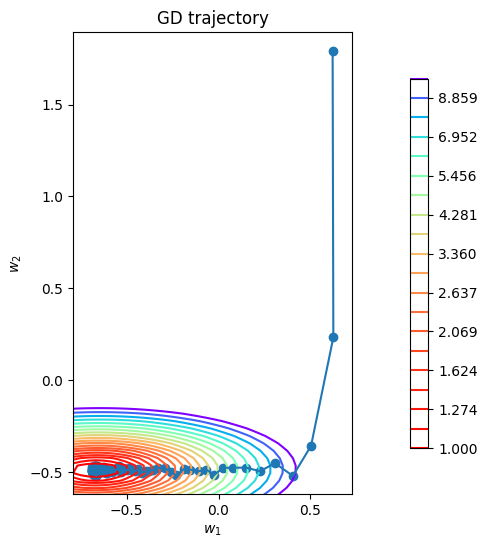

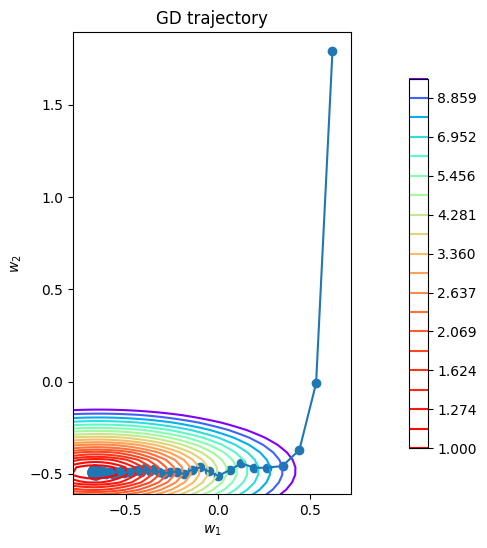

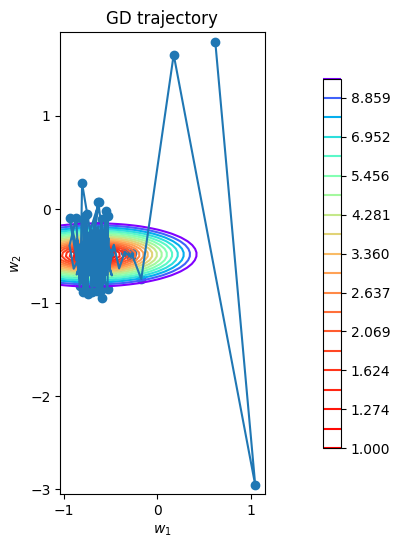

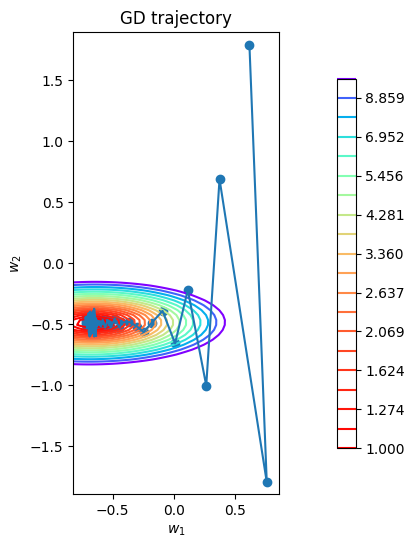

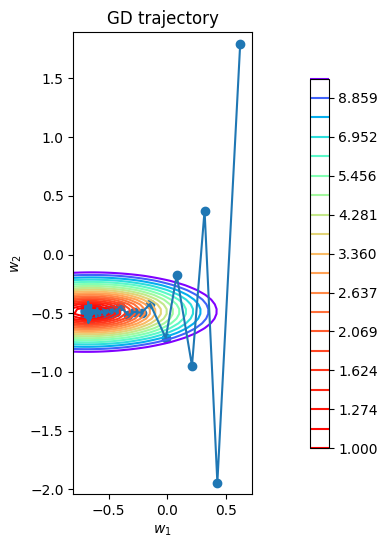

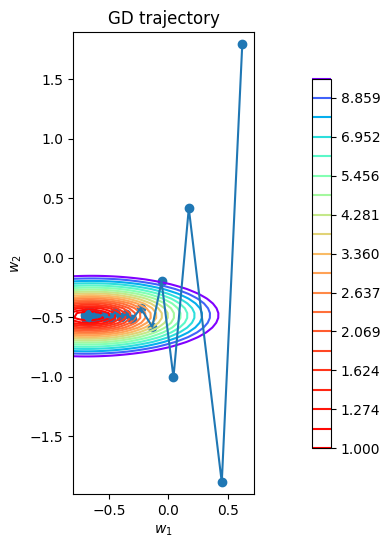

In [12]:
lrs = [0.0001, 0.001, 0.005, 0.01]
batch_sizes = [5, 50, 100, 200]
loss = MSELoss()

for lr in lrs:
  for batch_size in batch_sizes:
    plot_gd(stochastic_gradient_descent1(w_init, X, y, loss, lr, batch_size), X, y, loss) # 1000 iterations

Нетрудно заметить, что стохастический градиентный спуск более подвержен колебаниям, чем классический градиентный спуск. То есть можно сказать, что его "траектория спуска" не такая гладкая, как в стандартной версии, в ней наблюдаются скачки, однако все же алгоритм еще сходится (то есть находит минимум функции). С увеличением параметра learning rate, градиентный спуск начинает быть менее стабильным и скачки становятся больше, что логично, ведь learing rate как раз задает величину шага, на которую смещается точка на каждой итерации. При этом, увеличение batch_size приводит к стабилизации данного эффекта, так как на каждой итерации у нас есть более точное значение градиента (в сравнении с маленьким значением batch_size), которое нам даст больше информации о том, в какую сторону следует двигаться для минимизации функции, а значит, это будет давать нам более стабильный результат. Вообще, формально говоря, классический градиентный спуск - это тот же стохастический градиентный спуск, но на batch_size, равном размеру обучающей выборки. Значит, увеличивая batch_size, мы приближаем наш стохастический алгоритм к идеальному, то есть к классическому градиентному спуску, где градиент считается по всей выборке, В общем случае, классический алгоритм ведет себя стабильно и в нем не наблюдается резких скачков, что и объясняет то, что **с увеличением batch_size стохастический градиентный спуск начинает быть все более и более похожим на классический**

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага.

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точнее этого минимума достичь и не "перепрыгнуть" его.

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [13]:
def stochastic_gradient_descent2( # rename to avoid conficts in the future
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    p: float,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    old_w = w_init
    curr_w = None
    ans = []
    ans.append(w_init)
    for i in range(n_iterations):
      indexes = np.random.randint(0, y.size - 1, size=batch_size)
      curr_w  = old_w - (lr * (1 / (1 + i)) ** p) * loss.calc_grad(X[indexes], y[indexes], old_w)
      ans.append(curr_w)
      old_w = curr_w
    return ans

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска

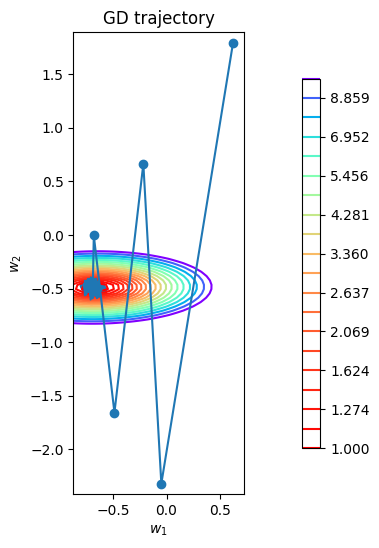

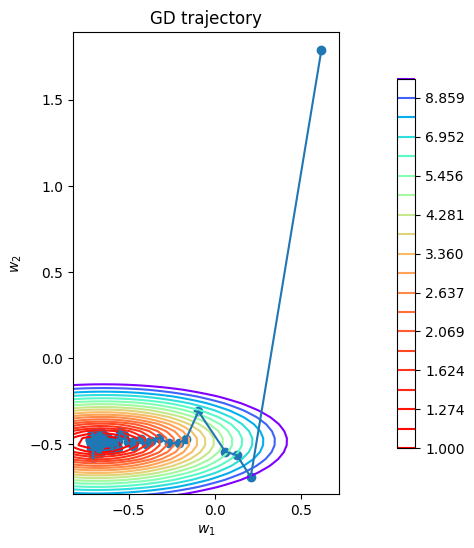

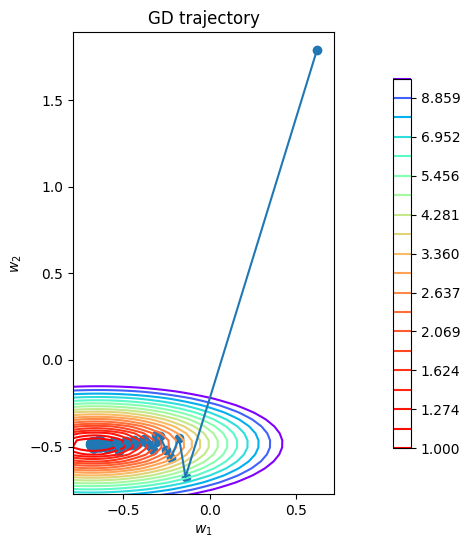

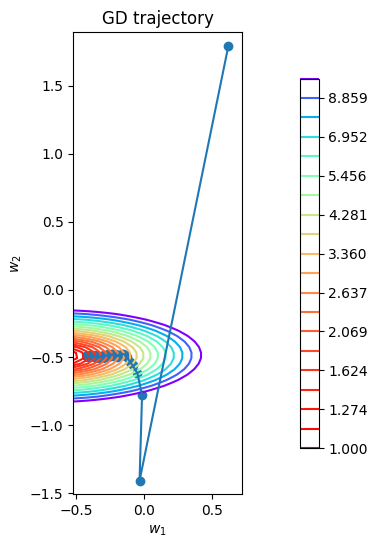

In [14]:
ps = [0.1, 0.2, 0.5, 1]
loss = MSELoss()

for p in ps:
  plot_gd(stochastic_gradient_descent2(w_init, X, y, loss, 0.01, 10, p), X, y, loss) # 1000 iterations

Получается, что с увеличением p, алгоритм сходится быстрее, а также конечные скачки становятся менее хаотичными засчет итерационного уменьшения шага (что наверняка и является причиной того, почему алгоритм сходится быстрее) (сходится в плане того, что находит минимум). При этом начальные скачки также большие, однако с увеличением числа итераций, траектория становится более гладкой, а не ломанной, что наверняка и обеспечивает видимый результат (более быструю сходимость алгоритма при больших p)

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

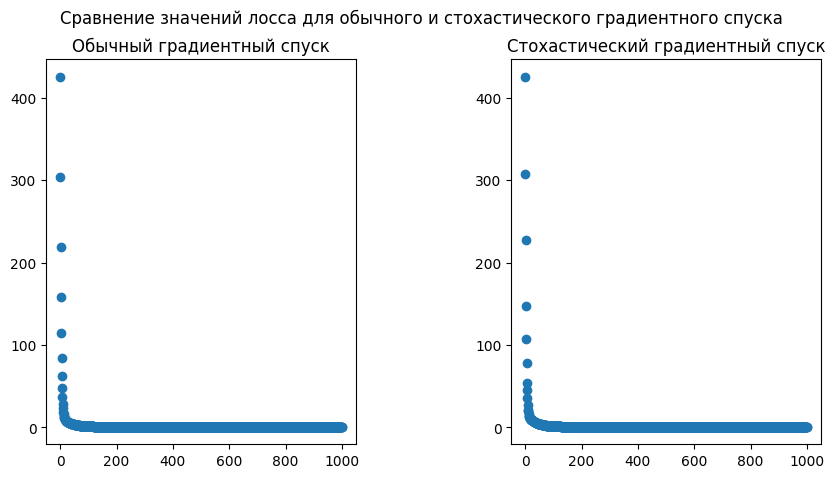

In [15]:
loss = MSELoss()

# lambda = 0.001
gd_weights = gradient_descent(w_init, X, y, loss, lr=0.001, n_iterations=1000)
gd_losses = np.array([loss.calc_loss(X, y, w) for w in gd_weights])

sgd_weights = stochastic_gradient_descent1(w_init, X, y, loss, lr=0.001, batch_size=10, n_iterations=1000)
sgd_losses = np.array([loss.calc_loss(X, y, w) for w in sgd_weights])
iterations = np.arange(1001) # extra one for initial weights

plt.figure(figsize=(10, 5))  # Установка размера фигуры

plt.subplot(1, 2, 1)
plt.title('Обычный градиентный спуск')
plt.scatter(iterations, gd_losses)

plt.subplot(1, 2, 2)
plt.scatter(iterations, sgd_losses)
plt.title('Стохастический градиентный спуск')

plt.subplots_adjust(wspace=0.5)  # Установка горизонтального расстояния между графиками
plt.suptitle('Сравнение значений лосса для обычного и стохастического градиентного спуска')

plt.show()

На данных графиках не видно преимущество SGD. Графики почти идентичны как для классического градиентного спуска, так и для стохастического. Единственно предположение, почему так может быть - таков подбор гиперпараметров (learning rate, n_iterations)

## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`

В методе `predict` мы будем применять нашу регрессию к датасету,

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

Несколько изменим с целью оптимизации *gradien_descent* так, чтобы он возвращал конечные веса, а не полную историю весов

In [84]:
def gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    n_iterations: int = 100000,
) -> np.ndarray:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    old_w = w_init
    curr_w = None
    for i in range(n_iterations):
      curr_w  = old_w - lr * loss.calc_grad(X, y, old_w)
      old_w = curr_w
    return curr_w

In [17]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr

    def fit(self, X: np.ndarray, y: np.ndarray) -> "LinearRegression":
        X = np.asarray(X)
        y = np.asarray(y)
        self.w = np.random.rand(X.shape[1] + 1, 1) # https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        y = y.reshape(-1, 1)
        self.w = gradient_descent(self.w, X, y, self.loss, self.lr, 10000)
        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        return X.dot(self.w)

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации.

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [18]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [19]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
    header=None,
    na_values=["?"],
)
X_raw.head()
X_raw = X_raw[~X_raw[25].isna()].reset_index()
X_raw.columns = X_raw.columns.astype(str)
X_raw

,index,0,1,2,3,4,5,6,7,8,...,16,17,18,19,20,21,22,23,24,25
0,0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,3,2,164.0,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,4,2,164.0,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
197,201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
198,202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
199,203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


Удалим признак index, так как он явно не несет смыслового содержания для задачи

In [20]:
X_raw.drop(columns=['index'], inplace=True)
X_raw

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
197,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
198,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
199,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [21]:
y = X_raw['25']
X_raw = X_raw.drop('25', axis=1)
X_raw

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28
197,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25
198,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23
199,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27


**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

In [22]:
categorical_variables = list(X_raw.select_dtypes(include=['object']).columns)
real_variables = list(X_raw.select_dtypes(include=['float64']).columns)
print("Категориальные переменные: ")
categorical_variables

Категориальные переменные: 


['2', '3', '4', '5', '6', '7', '8', '14', '15', '17']

In [23]:
if (X_raw.isnull().sum().sum() == 0):
  print("Нет пропущенных значений")
else:
  print("Есть пропущенные значения")

Есть пропущенные значения


Заполним пропуски с помощью SimpleImputer из sklearn

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Создаем экземпляры SimpleImputer для вещественных и категориальных признаков
imputer_cat = SimpleImputer(strategy='most_frequent')
imputer_num = SimpleImputer(strategy='mean')

# Создаем ColumnTransformer для применения разных преобразований к разным столбцам
# Здесь мы указываем, что столбцы с меткой object (категориальные) будут использовать imputer_cat,
# а столбцы с меткой numeric (вещественные) будут использовать imputer_num
preprocessor = ColumnTransformer(
    transformers=[
        ('object', imputer_cat, categorical_variables),
        ('numeric', imputer_num, real_variables)
    ])

# Применяем преобразование к данным
X_filled = pd.DataFrame(preprocessor.fit_transform(X_raw))
X_filled.columns = X_filled.columns.astype(str)

for column in range(10, 20):
  X_filled[str(column)] = pd.to_numeric(X_filled[str(column)], errors='coerce')

print(X_filled.dtypes)
X_filled

0      object
1      object
2      object
3      object
4      object
5      object
6      object
7      object
8      object
9      object
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
dtype: object


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,122.0,88.6,168.8,64.1,48.8,3.47,2.68,9.0,111.0,5000.0
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,122.0,88.6,168.8,64.1,48.8,3.47,2.68,9.0,111.0,5000.0
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,122.0,94.5,171.2,65.5,52.4,2.68,3.47,9.0,154.0,5000.0
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,164.0,99.8,176.6,66.2,54.3,3.19,3.40,10.0,102.0,5500.0
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,164.0,99.4,176.6,66.4,54.3,3.19,3.40,8.0,115.0,5500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi,95.0,109.1,188.8,68.9,55.5,3.78,3.15,9.5,114.0,5400.0
197,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi,95.0,109.1,188.8,68.8,55.5,3.78,3.15,8.7,160.0,5300.0
198,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi,95.0,109.1,188.8,68.9,55.5,3.58,2.87,8.8,134.0,5500.0
199,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi,95.0,109.1,188.8,68.9,55.5,3.01,3.40,23.0,106.0,4800.0


In [25]:
if (X_filled.isnull().sum().sum() == 0):
  print("Нет пропущенных значений")
else:
  print("Есть пропущенные значения")

Нет пропущенных значений


Закодируем категориальные переменные с помощью pd.get_dummies

In [26]:
X_encoded = pd.get_dummies(X_filled, drop_first=True, dtype=int) # удаляем первый столбец в каждой категории во избежание проблем мультиколлинеарности
# https://stackoverflow.com/questions/77643432/why-is-pd-get-dummies-returning-boolean-values-instead-of-the-binaries-of-0-1
X_encoded

,10,11,12,13,14,15,16,17,18,19,...,8_three,8_twelve,8_two,9_2bbl,9_4bbl,9_idi,9_mfi,9_mpfi,9_spdi,9_spfi
0,122.0,88.6,168.8,64.1,48.8,3.47,2.68,9.0,111.0,5000.0,...,0,0,0,0,0,0,0,1,0,0
1,122.0,88.6,168.8,64.1,48.8,3.47,2.68,9.0,111.0,5000.0,...,0,0,0,0,0,0,0,1,0,0
2,122.0,94.5,171.2,65.5,52.4,2.68,3.47,9.0,154.0,5000.0,...,0,0,0,0,0,0,0,1,0,0
3,164.0,99.8,176.6,66.2,54.3,3.19,3.40,10.0,102.0,5500.0,...,0,0,0,0,0,0,0,1,0,0
4,164.0,99.4,176.6,66.4,54.3,3.19,3.40,8.0,115.0,5500.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,95.0,109.1,188.8,68.9,55.5,3.78,3.15,9.5,114.0,5400.0,...,0,0,0,0,0,0,0,1,0,0
197,95.0,109.1,188.8,68.8,55.5,3.78,3.15,8.7,160.0,5300.0,...,0,0,0,0,0,0,0,1,0,0
198,95.0,109.1,188.8,68.9,55.5,3.58,2.87,8.8,134.0,5500.0,...,0,0,0,0,0,0,0,1,0,0
199,95.0,109.1,188.8,68.9,55.5,3.01,3.40,23.0,106.0,4800.0,...,0,0,0,0,0,1,0,0,0,0


Разобьем данные на тестовую и обучающую выборки

In [27]:
from sklearn.model_selection import train_test_split

np.random.seed(1337)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3) # параметр stratify тут не указываем, так как
# целевая переменная является метрической, а не категориальной
X_train

,10,11,12,13,14,15,16,17,18,19,...,8_three,8_twelve,8_two,9_2bbl,9_4bbl,9_idi,9_mfi,9_mpfi,9_spdi,9_spfi
28,145.0,95.9,173.2,66.3,50.2,3.600000,3.900000,7.0,145.0,5000.0,...,0,0,0,0,0,0,1,0,0,0
85,137.0,96.3,172.4,65.4,51.6,3.170000,3.460000,7.5,116.0,5500.0,...,0,0,0,0,0,0,0,0,1,0
53,150.0,95.3,169.0,65.7,49.6,3.330711,3.256904,9.4,101.0,6000.0,...,0,0,1,0,1,0,0,0,0,0
184,94.0,97.3,171.7,65.5,55.7,3.190000,3.400000,10.0,100.0,5500.0,...,0,0,0,0,0,0,0,1,0,0
186,256.0,94.5,165.7,64.0,51.4,3.190000,3.400000,8.5,90.0,5500.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,95.0,109.1,188.8,68.8,55.5,3.780000,3.150000,8.7,160.0,5300.0,...,0,0,0,0,0,0,0,1,0,0
167,134.0,98.4,176.2,65.6,52.0,3.620000,3.500000,9.3,116.0,4800.0,...,0,0,0,0,0,0,0,1,0,0
92,128.0,94.5,165.6,63.8,53.3,3.150000,3.290000,9.4,69.0,5200.0,...,0,0,0,1,0,0,0,0,0,0
189,122.0,100.4,183.1,66.9,55.1,3.190000,3.400000,9.0,88.0,5500.0,...,0,0,0,0,0,0,0,1,0,0


Нормализуем числовые признаки

In [28]:
categorical_variables = list(X_encoded.select_dtypes(include=['object']).columns)
real_variables = list(X_encoded.select_dtypes(include=['float64']).columns)
print("Вещественные переменные: ")
real_variables

Вещественные переменные: 


['10', '11', '12', '13', '14', '15', '16', '17', '18', '19']

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer([
        ('scaleRealVariables', StandardScaler(), real_variables)
    ], remainder='passthrough') # https://stackoverflow.com/questions/38420847/apply-standardscaler-to-parts-of-a-data-set

X_train_scaled = pd.DataFrame(ct.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(ct.transform(X_test), columns=X_test.columns)
X_train_scaled

,10,11,12,13,14,15,16,17,18,19,...,8_three,8_twelve,8_two,9_2bbl,9_4bbl,9_idi,9_mfi,9_mpfi,9_spdi,9_spfi
0,0.741981,-0.534421,-0.126632,0.151957,-1.658785,0.934734,2.082970,-0.785700,1.250855,-0.234804,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.483660,-0.468719,-0.190576,-0.261577,-1.057264,-0.638430,0.675636,-0.664134,0.400703,0.831270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.903432,-0.632976,-0.462337,-0.123732,-1.916579,-0.050467,0.026036,-0.202182,-0.039031,1.897343,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-0.904816,-0.304462,-0.246527,-0.215628,0.704331,-0.565260,0.483727,-0.056303,-0.068347,0.831270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4.326185,-0.764381,-0.726106,-0.904852,-1.143196,-0.565260,0.483727,-0.421001,-0.361503,0.831270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,-0.872525,1.633769,1.120274,1.300663,0.618400,1.593267,-0.315894,-0.372375,1.690589,0.404840,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
136,0.386790,-0.123779,0.113158,-0.169680,-0.885401,1.007904,0.803576,-0.226495,0.400703,-0.661233,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
137,0.193049,-0.764381,-0.734099,-0.996748,-0.326847,-0.711601,0.131894,-0.202182,-0.977130,0.191625,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
138,-0.000692,0.204734,0.664674,0.427647,0.446537,-0.565260,0.483727,-0.299435,-0.420134,0.831270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [40]:
linear_regression = LinearRegression(MSELoss(), 0.001)

linear_regression.fit(X_train_scaled, y_train)

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [41]:
from sklearn.metrics import mean_squared_error

train_pred = linear_regression.predict(X_train_scaled)
test_pred = linear_regression.predict(X_test_scaled)

print(f"Среднеквадратичная ошибка на тренировочной выборке: {mean_squared_error(y_train, train_pred)}")
print(f"Среднеквадратичная ошибка на тестовой выборке: {mean_squared_error(y_test, test_pred)}")

Среднеквадратичная ошибка на тренировочной выборке: 5922838.156213241
Среднеквадратичная ошибка на тестовой выборке: 15153466.94120142


Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`

Он должен вычислять лосс и градиент по формулам наверху

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`

In [58]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.0):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        return np.square(X.dot(w) - y).mean() + self.coef * np.linalg.norm(w, ord=2) ** 2

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        return (2 / y.size) * ((X.T).dot(X.dot(w) - y)) + 2 * self.coef * w

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [59]:
linear_regression = LinearRegression(MSEL2Loss(0.1), 0.001)

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации.

In [60]:
coefs = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]

for coef in coefs:
  print(f"Coef = {coef}")
  linear_regression = LinearRegression(MSEL2Loss(coef), 0.001)
  linear_regression.fit(X_train_scaled, y_train)
  train_pred = linear_regression.predict(X_train_scaled)
  test_pred = linear_regression.predict(X_test_scaled)
  print(f"Среднеквадратичная ошибка на тренировочной выборке: {mean_squared_error(y_train, train_pred)}")
  print(f"Среднеквадратичная ошибка на тестовой выборке: {mean_squared_error(y_test, test_pred)}")
  print("")

Coef = 1e-05
Среднеквадратичная ошибка на тренировочной выборке: 5923125.530109857
Среднеквадратичная ошибка на тестовой выборке: 15153369.202118749

Coef = 0.0001
Среднеквадратичная ошибка на тренировочной выборке: 5924704.676406739
Среднеквадратичная ошибка на тестовой выборке: 15148425.357354011

Coef = 0.001
Среднеквадратичная ошибка на тренировочной выборке: 5941632.234201917
Среднеквадратичная ошибка на тестовой выборке: 15100323.369132152

Coef = 0.01
Среднеквадратичная ошибка на тренировочной выборке: 6127258.316636426
Среднеквадратичная ошибка на тестовой выборке: 14677816.380470788

Coef = 0.1
Среднеквадратичная ошибка на тренировочной выборке: 8616601.713272562
Среднеквадратичная ошибка на тестовой выборке: 13469242.01849162

Coef = 1
Среднеквадратичная ошибка на тренировочной выборке: 26941286.60194704
Среднеквадратичная ошибка на тестовой выборке: 32085906.959534086



При коэффициенте регуляризации coef = 0.1 получилось добиться улучшения качества модели. Ошибка на тестовой выборке стала меньше, чем при обучении без регуляризации, но при этом ошибка на обучающей выборке возросла. Но нам важна именно ошибка на тестовой выборке, так как эти данные никак не использовались при обучении и по настоящему судить о качестве модели можно только на них, так что можно сказать, что нам удалось улучшить модель

В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`

Он должен вычислять лосс и градиент по формулам наверху

In [98]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        z = X.dot(w) - y
        return np.where(np.abs(z) < self.eps, 0.5 * z**2, self.eps * (np.abs(z) - 0.5 * self.eps)).mean()

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        z = X.dot(w) - y
        return (X.T).dot(np.where(np.abs(z) < self.eps, z, self.eps * np.sign(z))) / X.shape[0]


**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

In [99]:
coefs = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]

for coef in coefs:
  print(f"Coef = {coef}")
  linear_regression = LinearRegression(HuberLoss(coef), 0.001)
  linear_regression.fit(X_train_scaled, y_train)
  train_pred = linear_regression.predict(X_train_scaled)
  test_pred = linear_regression.predict(X_test_scaled)
  print(f"Среднеквадратичная ошибка на тренировочной выборке: {mean_squared_error(y_train, train_pred)}")
  print(f"Среднеквадратичная ошибка на тестовой выборке: {mean_squared_error(y_test, test_pred)}")
  print("")

Coef = 1e-05
Среднеквадратичная ошибка на тренировочной выборке: 239376908.43942472
Среднеквадратичная ошибка на тестовой выборке: 232088300.03120464

Coef = 0.0001
Среднеквадратичная ошибка на тренировочной выборке: 239342532.01234803
Среднеквадратичная ошибка на тестовой выборке: 232056352.71342123

Coef = 0.001
Среднеквадратичная ошибка на тренировочной выборке: 239342054.19863793
Среднеквадратичная ошибка на тестовой выборке: 232049788.91867393

Coef = 0.01
Среднеквадратичная ошибка на тренировочной выборке: 239325460.30984125
Среднеквадратичная ошибка на тестовой выборке: 232034079.52679914

Coef = 0.1
Среднеквадратичная ошибка на тренировочной выборке: 239213070.19308683
Среднеквадратичная ошибка на тестовой выборке: 231936397.64445347

Coef = 1
Среднеквадратичная ошибка на тренировочной выборке: 238202573.31331775
Среднеквадратичная ошибка на тестовой выборке: 230987117.1769645



По выведенной статистике видно, что модель сильно ухудшилась, причем как в сравнении с MSELoss, так и в сравнении с MSEL2Loss. Мы, конечно, избавились от переобучения, но теперь у нас ошибка как на тестовой, так и на обучающей выборке возросла буквально в десятки раз

**Задание 3 (0.08/8 балла)**
Вставьте ваш любимый мем 2021 в ячейку ниже:

# Анекдот
Во время пробежки Штирлиц остановился, чтобы перевести дух. "Spirit", - перевел Штирлиц и побежал дальше

### БОНУС (2.5 баллов)

Градиентный спуск — далеко не единственный метод оптимизации.
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2.5 баллов)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии.

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределением с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

In [368]:
# -- YOUR CODE HERE --